In [1]:
# import all necessary package

import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import csv

%matplotlib inline

In [2]:
tf.__version__

'1.4.0'

In [3]:
# create train path 
train_data_dir = os.path.join("./GTSRB/Final_Training/Images")

# create test path 
test_data_dir = os.path.join("./GTSRB/Final_Test/Images")

In [4]:

def map_file_to_classId(filename = 'GT-final_test.csv'):
    test_labels_ids={}
    with open(filename) as fin:
        reader=csv.reader(fin, skipinitialspace=True,delimiter=';')
        next(reader,None)

        for row in reader: 
            test_labels_ids[ os.path.join(test_data_dir,  row[0])]  = row[7]  
    return test_labels_ids
                

def get_lebel_id(file,test_labels_ids):
    return int(test_labels_ids[file])

    

In [5]:
def load_data(data_dir):
    
    ''' load all training and test data given path'''
    
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    if(not directories):
        label_dir = os.path.join(data_dir)
        file_names = [os.path.join(label_dir, f) 
                          for f in os.listdir(label_dir) if f.endswith(".ppm")]
        
        test_labels_ids = map_file_to_classId()
        
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(get_lebel_id(f,test_labels_ids))
    else:

        for d in directories:
            label_dir = os.path.join(data_dir, d)
            file_names = [os.path.join(label_dir, f) 
                          for f in os.listdir(label_dir) if f.endswith(".ppm")]

            for f in file_names:
                images.append(skimage.data.imread(f))
                labels.append(int(d))
                 
    return images, labels



train_images, train_labels = load_data(train_data_dir)
test_images,test_labels = load_data(test_data_dir)

In [8]:
#print ("Number of labels(classes): " , len(set(labels)))
#print ("Number of images in dataset: ", len(images))

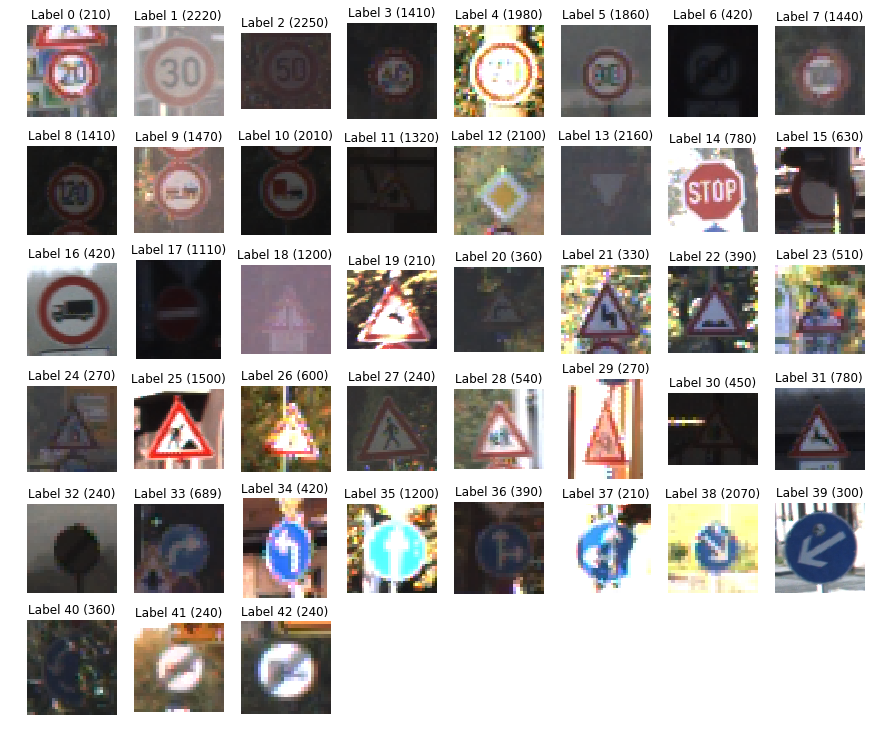

In [9]:
def display_images_and_labels(images, labels):
    
    ''' plot first image of all labels'''
    
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:

        image = images[labels.index(label)]
        plt.subplot(7, 8, i)  #7 rows , 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

# plot first image
display_images_and_labels(train_images, train_labels)

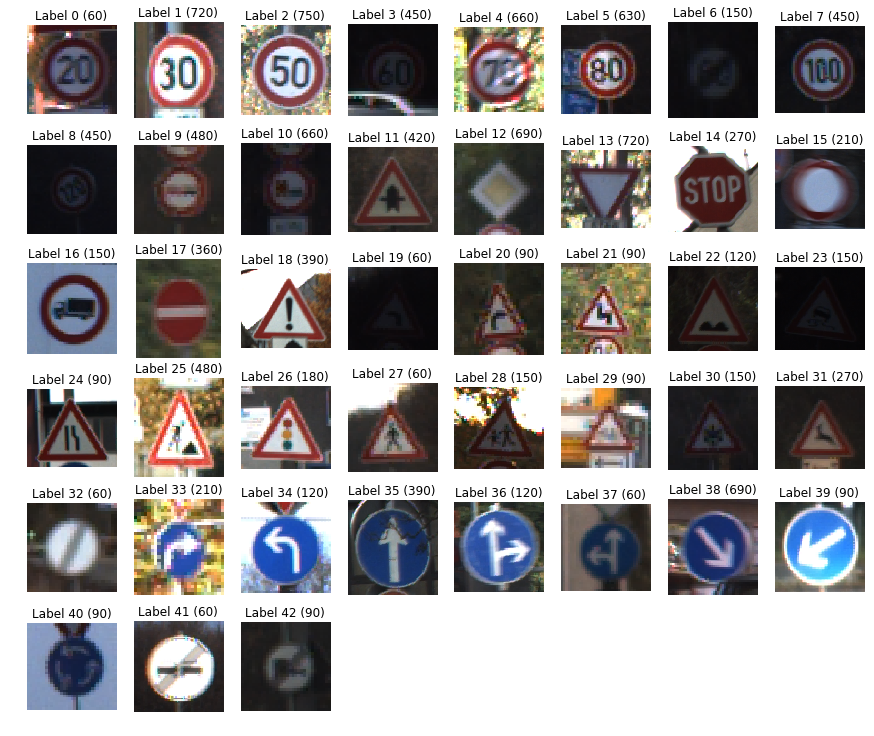

In [10]:
display_images_and_labels(test_images, test_labels)

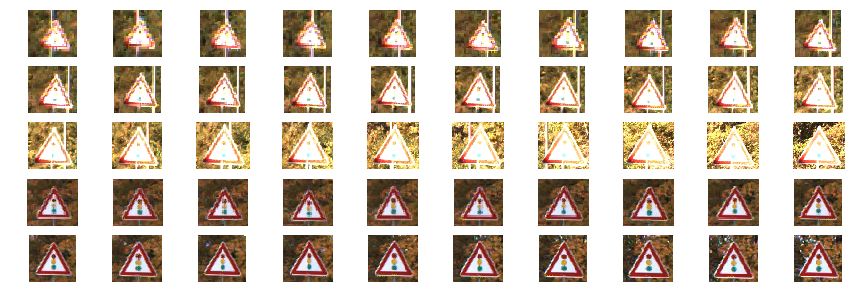

In [11]:
def display_label_images(images, label, labels):
    
    ''' plot first 50 images of given label(class) '''
    
    limit = 50  # 50 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(5, 10, i)  # 5 rows, 10 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

# plot label image
display_label_images(train_images, 26, train_labels)

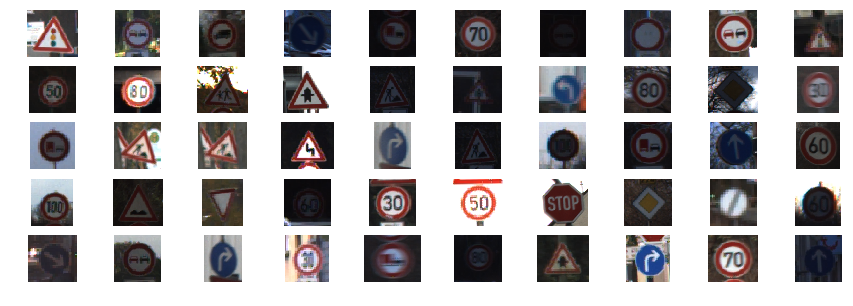

In [12]:
display_label_images(test_images, 26, test_labels)

In [13]:
def print_image_shape(images,number_of_images=20):
    
    ''' print 0 to number_of_images   '''
    
    for image in images[:number_of_images]:
        print("shape: {0}, min: {1}, max: {2}"
                .format(image.shape, image.min(), image.max()))


# print images shape 
print_image_shape(train_images,30)

shape: (30, 29, 3), min: 31, max: 255
shape: (30, 30, 3), min: 38, max: 255
shape: (30, 30, 3), min: 40, max: 255
shape: (31, 31, 3), min: 28, max: 255
shape: (32, 30, 3), min: 27, max: 255
shape: (31, 31, 3), min: 26, max: 255
shape: (34, 33, 3), min: 0, max: 255
shape: (35, 34, 3), min: 16, max: 255
shape: (34, 33, 3), min: 0, max: 255
shape: (36, 36, 3), min: 16, max: 255
shape: (36, 35, 3), min: 29, max: 255
shape: (38, 37, 3), min: 25, max: 255
shape: (38, 37, 3), min: 20, max: 255
shape: (39, 40, 3), min: 22, max: 255
shape: (42, 41, 3), min: 24, max: 255
shape: (44, 44, 3), min: 18, max: 255
shape: (44, 46, 3), min: 16, max: 255
shape: (48, 47, 3), min: 23, max: 255
shape: (48, 50, 3), min: 17, max: 255
shape: (51, 53, 3), min: 19, max: 255
shape: (54, 57, 3), min: 16, max: 255
shape: (58, 59, 3), min: 10, max: 255
shape: (61, 63, 3), min: 12, max: 255
shape: (70, 70, 3), min: 11, max: 255
shape: (76, 76, 3), min: 8, max: 255
shape: (86, 85, 3), min: 0, max: 255
shape: (97, 97, 

In [14]:
def get_min_image(images):
  
    ''' returns a tupel of minimum image'''
    
    return min(s.shape for s in images)

def get_max_image(images):
  
    ''' returns a tupel of maximum image'''
    
    return max(s.shape for s in images)

print(' min image -> ',get_min_image(train_images))
print(' max image -> ',get_max_image(train_images))

 min image ->  (25, 25, 3)
 max image ->  (225, 243, 3)


In [15]:
# image size
img_size = 35

# rgb.
num_channels = 3

img_size_flat = img_size * img_size*num_channels

img_shape = (img_size, img_size,num_channels)

num_classes = 43

In [16]:
def resize_images(images,image_size =(35,35,3)):
    
    ''' resize all images given image size
        default value -> (35,35)
        you can change also rgb value '''
    
    return [skimage.transform.
            resize(image, image_size)
            for image in images]

#resize all images

train_images = resize_images(train_images,img_shape)
test_images =  resize_images(test_images,img_shape)

C:\Users\Mustafa\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [17]:
print(' min image -> ',get_min_image(train_images))
print(' max image -> ',get_max_image(train_images))

 min image ->  (35, 35, 3)
 max image ->  (35, 35, 3)


In [ ]:
#convert all images to numpy array
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
def flatten_images(images,img_size_flat):
    ''' reshape all images given imgage size'''
    return images.flatten().reshape(len(images),img_size_flat)

In [17]:
def one_hot_labels(labels):
    ''' one hot Encoding '''
    targets = labels.reshape(-1)
    one_hot_labels = np.eye(num_classes)[targets]
    return one_hot_labels

In [18]:

train_images = flatten_images(train_images,img_size_flat)
test_images =  flatten_images(test_images,img_size_flat)

In [19]:
train_labels = one_hot_labels(train_labels)
test_labels = one_hot_labels(test_labels)

In [20]:
#print all train test images and labels
print(train_images.shape,test_images.shape)
print(train_labels.shape,test_labels.shape)

(39209, 2352) (12630, 2352)
(39209, 43) (12630, 43)
